In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Bài toán 01A - Nạp dữ liệu train và test

## Nạp dữ liệu ảnh train và test

In [ ]:
import os
import numpy as np
import cv2

In [ ]:
# Hàm tải dữ liệu từ thư mục và chuyển đổi thành mảng ảnh
def load_images_from_folder(base_path, split):
    images = []
    labels = []

    split_folder = os.path.join(base_path, split)

    for class_name in os.listdir(split_folder):
        class_folder = os.path.join(split_folder, class_name)

        if os.path.isdir(class_folder):
            for image_name in os.listdir(class_folder):
                image_path = os.path.join(class_folder, image_name)

                # Đọc ảnh và chuyển đổi sang dạng mảng NumPy
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Chuyển đổi từ BGR sang RGB

                # Thêm ảnh và nhãn vào danh sách
                images.append(image)
                labels.append(class_name)  # Sử dụng tên thư mục làm nhãn

    # Chuyển thành mảng NumPy
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

In [ ]:
# Đường dẫn cơ bản đến thư mục dataset
base_path = '/content/drive/MyDrive/CS231_Đồ_Án/preprocessed'

# Tải dữ liệu từ thư mục train, test
x_train, y_train = load_images_from_folder(base_path, 'train')
x_test, y_test = load_images_from_folder(base_path, 'test')

In [ ]:
print("Tập huấn luyện:", x_train.shape)
print("Tập kiểm tra:", x_test.shape)

Tập huấn luyện: (170, 512, 512, 3)
Tập kiểm tra: (30, 512, 512, 3)


## Hàm rút trích đặt trưng

In [ ]:
import numpy as np
import cv2
import pandas as pd

In [ ]:
from skimage.feature import hog

def HOG_feature(img):
    # Chuyển ảnh sang grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Tính HOG features
    features = hog(img,
                   orientations=9,
                   pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2),
                   block_norm='L2-Hys',
                   transform_sqrt=True,
                   visualize=False,
                   feature_vector=True)
    return features

## Rút trích đặc trưng ảnh train

In [ ]:
# Rút trích đặc trưng các ảnh dữ liệu train
x_train_features = []
y_train_labels = []
intAll = x_train.shape[0]
for i in range(intAll):
  x_train_features.append(HOG_feature(x_train[i]))
  y_train_labels.append(y_train[i])

In [ ]:
#Lưu kết quả rút trích đặc trưng xuống
filename = '/content/drive/MyDrive/CS231_Đồ_Án/HOGFeature_Train_newest.csv'
x_train_features = np.array(x_train_features)
y_train_labels = np.array(y_train_labels)
df_train = pd.DataFrame(x_train_features)
df_train.insert(0, 'label', y_train_labels)
df_train.to_csv(filename, index=False)

In [ ]:
print(x_train_features)

print(df_train)

[[0.25797189 0.10747682 0.06119314 ... 0.17207194 0.18687983 0.12877493]
 [0.25944343 0.01470954 0.00934065 ... 0.10996921 0.01074038 0.03059883]
 [0.13437762 0.09478713 0.08820231 ... 0.2188183  0.20406018 0.20684735]
 ...
 [0.25945773 0.0757054  0.07449435 ... 0.13735378 0.22189865 0.18462045]
 [0.23420967 0.08029254 0.10221301 ... 0.07708598 0.16793941 0.12081989]
 [0.24361915 0.03207096 0.07468552 ... 0.10691905 0.12869465 0.05811993]]
                       label         0         1         2         3  \
0    atorvastatin_teva_20_mg  0.257972  0.107477  0.061193  0.201409   
1    atorvastatin_teva_20_mg  0.259443  0.014710  0.009341  0.000000   
2    atorvastatin_teva_20_mg  0.134378  0.094787  0.088202  0.255445   
3    atorvastatin_teva_20_mg  0.239810  0.032383  0.031555  0.022805   
4    atorvastatin_teva_20_mg  0.193836  0.025756  0.101415  0.121262   
..                       ...       ...       ...       ...       ...   
165            betaloc_50_mg  0.247697  0.097708  0.

## Rút trích đặc trưng ảnh test

In [ ]:
# Rút trích đặc trưng các ảnh dữ liệu test
x_test_features = []
y_test_labels = []
intAll = x_test.shape[0]

for i in range(intAll):
 x_test_features.append(HOG_feature(x_test[i]))
 y_test_labels.append(y_test[i])

In [ ]:
#Lưu kết quả rút trích đặc trưng xuống
filename = '/content/drive/MyDrive/CS231_Đồ_Án/HOGFeature_Test_newest.csv'
x_test_features = np.array(x_test_features)
y_test_labels = np.array(y_test_labels)

df_test = pd.DataFrame(x_test_features)
df_test.insert(0, 'label', y_test_labels)
df_test.to_csv(filename, index=False)

# Bài toán 02 - Xây dựng model

## Nạp dữ liệu ảnh train

In [ ]:
#Đọc dữ liệu từ file csv có tên Thuoc_LBPFeature_Train.csv
filename = '/content/drive/MyDrive/CS231_Đồ_Án/HOGFeature_Train_newest.csv'

print("Đang đọc file dữ liệu...")
df_train = pd.read_csv(filename)
X_train = df_train.iloc[:, 1:].values  # Đặc trưng
y_train = df_train.iloc[:, 0].values  # Nhãn
print("Đọc xong!!!")

print(X_train, y_train)

Đang đọc file dữ liệu...
Đọc xong!!!
[[0.25797189 0.10747682 0.06119314 ... 0.17207194 0.18687983 0.12877493]
 [0.25944343 0.01470954 0.00934065 ... 0.10996921 0.01074038 0.03059883]
 [0.13437762 0.09478713 0.08820231 ... 0.2188183  0.20406018 0.20684735]
 ...
 [0.25945773 0.0757054  0.07449435 ... 0.13735378 0.22189865 0.18462045]
 [0.23420967 0.08029254 0.10221301 ... 0.07708598 0.16793941 0.12081989]
 [0.24361915 0.03207096 0.07468552 ... 0.10691905 0.12869465 0.05811993]] ['atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_t

## Nạp dữ liệu ảnh test

In [ ]:
# Nạp dữ liệu ảnh test của bài toán phân lớp ảnh.
filename = '/content/drive/MyDrive/CS231_Đồ_Án/HOGFeature_Test_newest.csv'

print("Đang đọc file dữ liệu...")
df_test = pd.read_csv(filename)
X_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values
print("Đọc xong!!!")


Đang đọc file dữ liệu...
Đọc xong!!!


## Chuẩn hóa tập huấn luyện và kiểm tra

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:
# Bước 2: Chuẩn hóa dữ liệu (SVM yêu cầu dữ liệu chuẩn hóa)
scaler = StandardScaler()

In [ ]:
# Chuẩn hóa tập huấn luyện và tập kiểm tra
X_train_scaled = scaler.fit_transform(X_train)  # Chuẩn hóa tập huấn luyện
X_test_scaled = scaler.transform(X_test)  # Chuẩn hóa tập kiểm tra

## Plot dữ liệu được rút trích từ ảnh Train

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

In [ ]:
# Encode the labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)

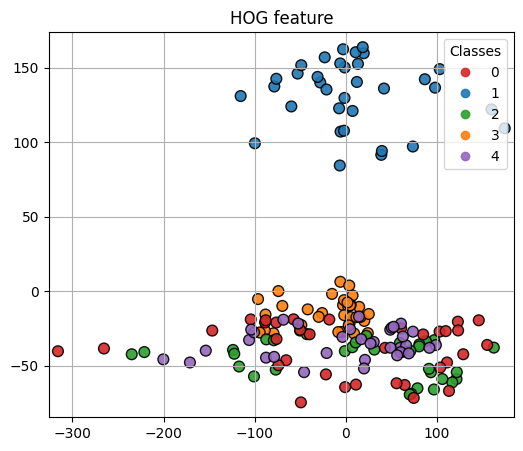

['atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg' 'ambroxol_egis_30_mg'
 'ambroxol_egis_30_mg' 'ambroxol_egis_30_mg' 'ambroxol_egis_30_mg'
 'ambroxol

In [ ]:
# Giảm số chiều về 2 với PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_scaled)

fig, ax = plt.subplots(figsize=(6, 5))

# Điều chỉnh giới hạn trục sao cho phù hợp với dữ liệu
ax.set(xlim=(np.min(X_reduced[:, 0]) - 10, np.max(X_reduced[:, 0]) + 10),
       ylim=(np.min(X_reduced[:, 1]) - 10, np.max(X_reduced[:, 1]) + 10))

bright_colors = ['#D62728', '#1F77B4', '#2CA02C', '#FF7F0E', '#9467BD']

# Giảm kích thước các điểm và thêm lưới
# scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], s=50, c=y_encoded, cmap='viridis', edgecolors="k", alpha=0.7)
# Scatter points
scatter = ax.scatter(
    X_reduced[:, 0], X_reduced[:, 1],
    c=y_encoded, cmap=ListedColormap(bright_colors),
    edgecolor='k', s=60, alpha=0.9
)

# Thêm lưới và điều chỉnh kiểu hiển thị
ax.grid(True)
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")

ax.set_title("HOG feature")
plt.show()

print(y_train)
print(y_encoded)

## Áp dụng GridSearchCV

In [ ]:
# Bước 3: Định nghĩa mô hình SVM
svm = SVC()

In [ ]:
# Bước 4: Định nghĩa tham số cần tìm kiếm (các siêu tham số của SVM)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Bước 5: Tạo GridSearchCV để tìm kiếm tham số tốt nhất
grid = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Bước 6: Huấn luyện mô hình với GridSearchCV
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=1)

In [ ]:
# Bước 7: In ra tham số tốt nhất và điểm kiểm tra (best score)
print("Best parameters found: ", grid.best_params_)
print("Best cross-validation accuracy: ", grid.best_score_)

Best parameters found:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy:  0.8941176470588236


In [ ]:
# Lưu mô hình với tham số tốt nhất
import pickle

best_model = grid.best_estimator_
# Lưu mô hình đã huấn luyện xuống file .pkl
model_filename = '/content/drive/MyDrive/CS231_Đồ_Án/HOG_best_model_newest.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_model, model_file)

print(f"Mô hình đã được lưu xuống: {model_filename}")

Mô hình đã được lưu xuống: /content/drive/MyDrive/CS231_Đồ_Án/HOG_best_model_newest.pkl


## Plot tập rút trích của tập train sau khi qua mô hình SVM với kernel tốt nhất

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [ ]:
# 1. Giảm chiều dữ liệu xuống 2D với PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_scaled)

In [ ]:
# 2. Load SVM best_params từ file lưu mô hình
with open('/content/drive/MyDrive/CS231_Đồ_Án/HOG_best_model_newest.pkl', 'rb') as f:
    best_svm = pickle.load(f)
best_params = best_svm.get_params()

In [ ]:
# 3. Khởi tạo và huấn luyện SVM trên không gian 2D
tsvm = SVC(**best_params)
tsvm.fit(X_reduced, y_encoded)

SVC(C=0.1, kernel='linear')

In [ ]:
# 4. Tạo lưới cho decision boundary
x_min, x_max = X_reduced[:, 0].min() - 10, X_reduced[:, 0].max() + 10
y_min, y_max = X_reduced[:, 1].min() - 10, X_reduced[:, 1].max() + 10
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)
grid = np.c_[xx.ravel(), yy.ravel()]

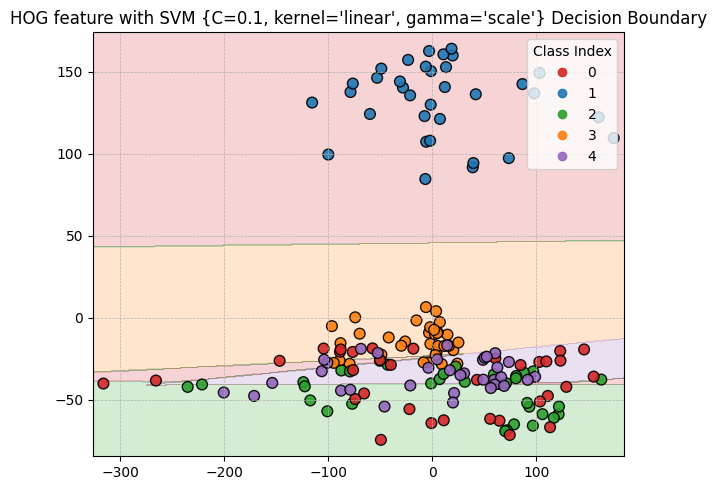

In [ ]:
# 5. Dự đoán nhãn trên lưới
Z = tsvm.predict(grid).reshape(xx.shape)

# 6. Vẽ scatter + decision boundary với legend góc trên phải hiển thị chỉ số lớp
fig, ax = plt.subplots(figsize=(6, 5))

# Vùng phân lớp
bright_colors = ['#D62728', '#1F77B4', '#2CA02C', '#FF7F0E', '#9467BD']
cmap_light = ListedColormap(bright_colors)
ax.contourf(xx, yy, Z, alpha=0.2, cmap=cmap_light)

# Scatter points
scatter = ax.scatter(
    X_reduced[:, 0], X_reduced[:, 1],
    c=y_encoded, cmap=ListedColormap(bright_colors),
    edgecolor='k', s=60, alpha=0.9
)

# Legend hiển thị chỉ số lớp
ax.legend(*scatter.legend_elements(), loc='upper right', title='Class Index')

# Cấu hình trục, lưới và tiêu đề
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.grid(True, linestyle='--', linewidth=0.5)
ax.set_title("HOG feature with SVM {C=0.1, kernel='linear', gamma='scale'} Decision Boundary")

plt.tight_layout()
plt.show()

# Bài toán 03 - Kiểm thử model

In [ ]:
#Độc mô hình từ tập tin định dạng pkl có tên CIFAR10_LBPFeatureKNNModel.pkl
import pickle
filename = "/content/drive/MyDrive/CS231_Đồ_Án/HOG_best_model_newest.pkl"
with open(filename, 'rb') as file:
 model = pickle.load(file)

In [ ]:
# Lấy ngẫu nhiên một ảnh từ tập dữ liệu test và sử dụng model để predict (phân lớp)
import numpy as np
import random
index = random.randrange(x_test.shape[0])
y_pred = model.predict(X_test[index:index+1])

In [ ]:
import os
from glob import glob
image_path = "/content/drive/MyDrive/CS231_Đồ_Án/preprocessed/test/betaloc_50_mg/038.png"
# Tạo danh sách đường dẫn ảnh test
test_dir = "/content/drive/MyDrive/CS231_Đồ_Án/preprocessed/test"
# X_test_paths = sorted(glob(os.path.join(test_dir, "*", "*.png")))  # tìm trong các thư mục con
X_test_paths = (glob(os.path.join(test_dir, "*", "*.png")))

# Tìm chỉ số của ảnh này trong danh sách đường dẫn
index = X_test_paths.index(image_path)

# Dự đoán ảnh tại chỉ số đó
y_pred = model.predict(X_test_scaled[index:index+1])

print(y_test)

['ambroxol_egis_30_mg' 'ambroxol_egis_30_mg' 'ambroxol_egis_30_mg'
 'ambroxol_egis_30_mg' 'ambroxol_egis_30_mg' 'ambroxol_egis_30_mg'
 'akineton_2_mg' 'akineton_2_mg' 'akineton_2_mg' 'akineton_2_mg'
 'akineton_2_mg' 'akineton_2_mg' 'algopyrin_500_mg' 'algopyrin_500_mg'
 'algopyrin_500_mg' 'algopyrin_500_mg' 'algopyrin_500_mg'
 'algopyrin_500_mg' 'betaloc_50_mg' 'betaloc_50_mg' 'betaloc_50_mg'
 'betaloc_50_mg' 'betaloc_50_mg' 'betaloc_50_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg' 'atorvastatin_teva_20_mg'
 'atorvastatin_teva_20_mg']


Text(0.5, 1.0, 'Label predict:betaloc_50_mg(21)')

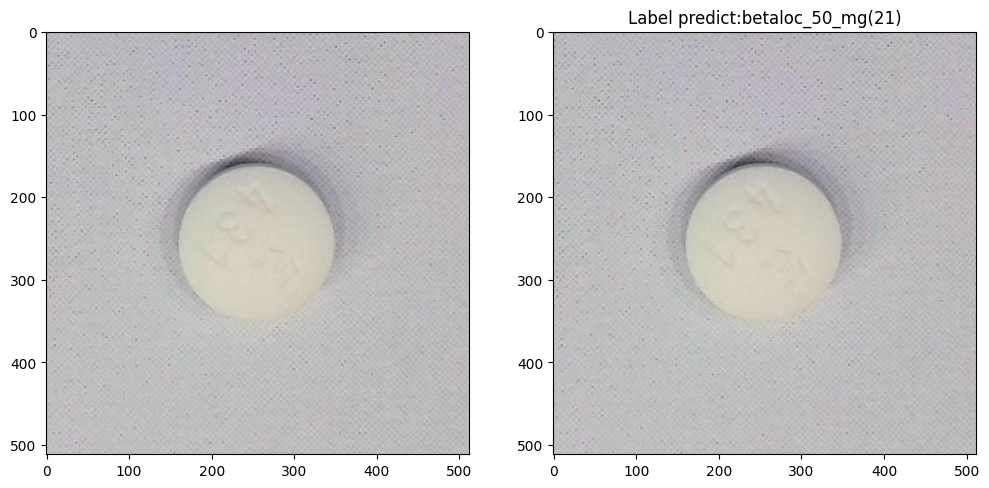

In [ ]:
#Trực quan hoá dữ liệu gốc (ảnh + nhãn) và kết quả dự đoán (predict)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(x_test[index], cmap='Greys')
# strTitle = 'Label:'
# strTitle = strTitle + format(y_test[index])
# strTitle = strTitle + '('+ format(index)+')'
# plt.title(strTitle)

plt.subplot(1,2,2)
plt.imshow(x_test[index], cmap='Greys')
strTitle = 'Label predict:'
strTitle = strTitle + format(y_pred[0])
strTitle = strTitle + '('+ format(index)+')'
plt.title(strTitle)

## Kiểm thử model với ảnh bên ngoài

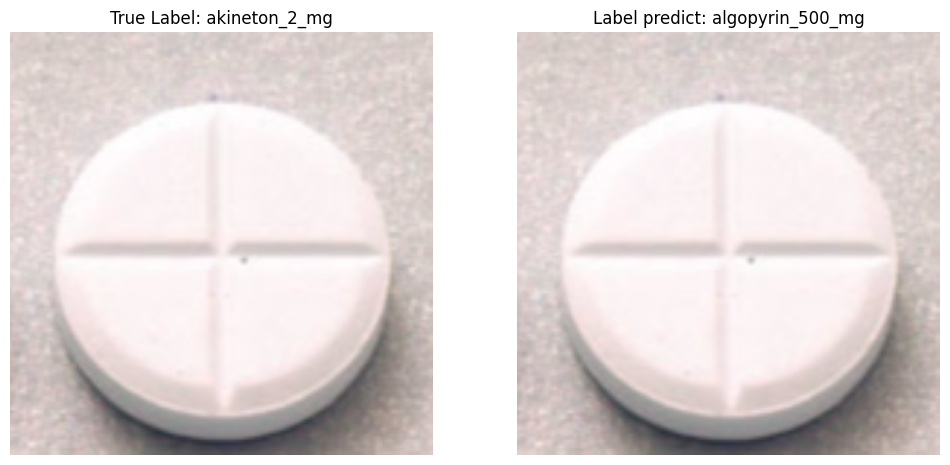

In [ ]:
import matplotlib.pyplot as plt

# Đọc hình ảnh mới (không phải từ tập train/test)
# image_path = "/content/drive/MyDrive/CS231/Đồ án/akii.png"
# image_path="/content/drive/MyDrive/CS231_Đồ_Án/preprocessed/test/akineton_2_mg/036.png"
image_path="/content/drive/MyDrive/CS231_Đồ_Án/anh_demo.png"
#image_path="/content/drive/MyDrive/CS231_Đồ_Án/preprocessed/anh_ben_ngoai.jpg"
image = cv2.imread(image_path)  # Đọc ảnh ở định dạng grayscale

# Rút trích đặc trưng LBP từ ảnh
hog_features = HOG_feature(np.array(image))

# Chuẩn hóa đặc trưng LBP (giả sử bạn đã chuẩn hóa trên tập train)
hog_features_scaled = scaler.transform(hog_features.reshape(1, -1))  # Dùng transform thay vì fit_transform

# Dự đoán nhãn cho ảnh mới
y_pred = model.predict(hog_features_scaled)

plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1)
plt.imshow(image)  # Hiển thị ảnh màu
plt.title(f"True Label: akineton_2_mg")
plt.axis('off')

# Trực quan hóa kết quả
plt.subplot(1, 2, 2)
plt.imshow(image)  # Hiển thị ảnh gốc
plt.title(f"Label predict: {y_pred[0]}")
plt.axis('off')
plt.show()

# Bài toán 05 - Đánh giá model tốt nhất trên tập test

In [ ]:
from skimage import io
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Đọc mô hình
filename = "/content/drive/MyDrive/CS231_Đồ_Án/HOG_best_model_newest.pkl"
with open(filename, 'rb') as file:
 model = pickle.load(file)

In [ ]:
#Dự đoán kết quả của toàn bộ tập dữ liệu test
y_pred = model.predict(X_test_scaled)

In [ ]:
#CHẠY LẠI THỬ
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

          akineton_2_mg       1.00      1.00      1.00         6
       algopyrin_500_mg       1.00      1.00      1.00         6
    ambroxol_egis_30_mg       1.00      1.00      1.00         6
atorvastatin_teva_20_mg       1.00      1.00      1.00         6
          betaloc_50_mg       1.00      1.00      1.00         6

               accuracy                           1.00        30
              macro avg       1.00      1.00      1.00        30
           weighted avg       1.00      1.00      1.00        30



In [ ]:
# Thực hiện classification report và lưu kết quả xuống tập tin csv
# Thuoc_LBPFeatureSVMReport_Test_best_degree5.csv
from sklearn.metrics import classification_report
filename = '/content/drive/MyDrive/CS231_Đồ_Án/Report_newest.csv'
report = classification_report(y_test, y_pred, output_dict=True)

report = pd.DataFrame(report).transpose()
report.to_csv(filename, index=False)
print(report)

                         precision  recall  f1-score  support
akineton_2_mg                  1.0     1.0       1.0      6.0
algopyrin_500_mg               1.0     1.0       1.0      6.0
ambroxol_egis_30_mg            1.0     1.0       1.0      6.0
atorvastatin_teva_20_mg        1.0     1.0       1.0      6.0
betaloc_50_mg                  1.0     1.0       1.0      6.0
accuracy                       1.0     1.0       1.0      1.0
macro avg                      1.0     1.0       1.0     30.0
weighted avg                   1.0     1.0       1.0     30.0


In [ ]:
# Tính các độ đo trên tập test
accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall_test = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1_test = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
print(f"Test Precision: {precision_test:.2f}")
print(f"Test Recall: {recall_test:.2f}")
print(f"Test F1 Score: {f1_test:.2f}")

Test Accuracy: 100.00%
Test Precision: 1.00
Test Recall: 1.00
Test F1 Score: 1.00


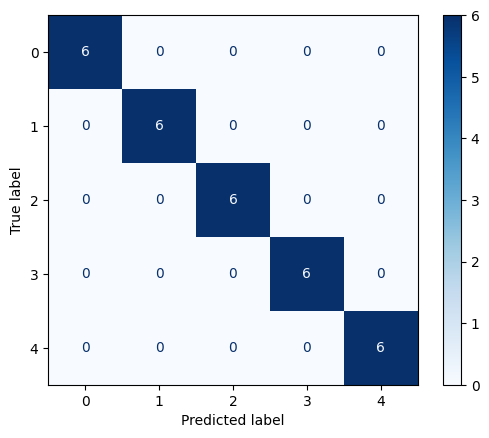

In [ ]:
# Xuất confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## In ra các hình ảnh phân loại sai

In [ ]:
# 1. Xác định các chỉ số bị phân loại sai
mis_idx = np.where(y_pred != y_test)[0]
print(f"Total misclassified: {len(mis_idx)} / {len(y_test)}")

Total misclassified: 0 / 30


In [ ]:
# 2. Hiển thị một số ảnh sai (ví dụ 16 ảnh đầu)
num_to_show = min(16, len(mis_idx))
plt.figure(figsize=(12,12))

for i, idx in enumerate(mis_idx[:num_to_show]):
    plt.subplot(4, 4, i+1)
    # Hiển thị ảnh gốc
    plt.imshow(x_test[idx], cmap=None)   # nếu ảnh màu dùng cmap=None
    plt.title(f"True: {y_test[idx]} \n → Pred: {y_pred[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

<Figure size 1200x1200 with 0 Axes>

# Bài toán 06: thử kết quả trên cấu hình {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

## Huấn luyện mô hình

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Bước 2: Chuẩn hóa dữ liệu (SVM yêu cầu dữ liệu chuẩn hóa)
scaler = StandardScaler()

In [ ]:
# Chuẩn hóa tập huấn luyện và tập kiểm tra
X_train_scaled = scaler.fit_transform(X_train)  # Chuẩn hóa tập huấn luyện
X_test_scaled = scaler.transform(X_test)  # Chuẩn hóa tập kiểm tra

In [ ]:
from sklearn.svm import SVC

# Huấn luyện mô hình SVM (hoặc mô hình khác)
svm = SVC(kernel='rbf', gamma = 'scale', C=10)
svm.fit(X_train_scaled, y_train)

SVC(C=10)

## Plot tập rút trích của tập train sau khi qua mô hình SVM với kernel {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

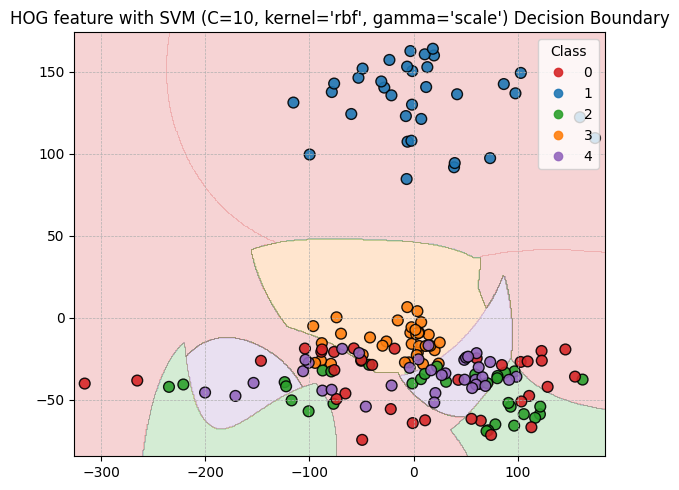

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Giả sử bạn đã có X_train, y_train, X_test, y_test
# Mã hóa nhãn nếu cần
# label_encoder = LabelEncoder().fit(y_train)
y_encoded = LabelEncoder().fit_transform(y_train)

# 1. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. PCA xuống 2D
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_scaled)

# 3. Huấn luyện SVM với cấu hình cố định
params = {'C': 10, 'kernel': 'rbf', 'gamma': 'scale'}
svm = SVC(**params)
svm.fit(X_train_2d, y_encoded)

# 4. Tạo lưới để vẽ decision boundary
x_min, x_max = X_train_2d[:,0].min() - 10, X_train_2d[:,0].max() + 10
y_min, y_max = X_train_2d[:,1].min() - 10, X_train_2d[:,1].max() + 10
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)
grid = np.c_[xx.ravel(), yy.ravel()]

# 5. Dự đoán nhãn trên lưới
Z = svm.predict(grid).reshape(xx.shape)

# 6. Plot decision boundary và scatter
fig, ax = plt.subplots(figsize=(6,5))

# Màu sắc
colors = ['#D62728', '#1F77B4', '#2CA02C', '#FF7F0E', '#9467BD']
cmap_light = ListedColormap(colors)

# Vùng phân lớp
ax.contourf(xx, yy, Z, alpha=0.2, cmap=cmap_light)

# Scatter
scatter = ax.scatter(
    X_train_2d[:,0], X_train_2d[:,1],
    c=y_encoded, cmap=ListedColormap(colors),
    edgecolor='k', s=60, alpha=0.9
)

# Legend chỉ số lớp
ax.legend(*scatter.legend_elements(), loc='upper right', title='Class')

# Thiết lập
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_title("HOG feature with SVM (C=10, kernel='rbf', gamma='scale') Decision Boundary")
ax.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## Kiểm thử kết quả trên tập test

In [ ]:
# Dự đoán trên tập test
y_pred = svm.predict(X_test_scaled)

ValueError: X has 142884 features, but SVC is expecting 2 features as input.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# In classification report
print(classification_report(y_test, y_pred))

In [ ]:
# In độ chính xác
print("Accuracy:", accuracy_score(y_test, y_pred))

## Kiểm thử model

In [ ]:
import os
from glob import glob
image_path = "/content/drive/MyDrive/CS231_Đồ_Án/preprocessed/test/betaloc_50_mg/038.png"
# Tạo danh sách đường dẫn ảnh test
test_dir = "/content/drive/MyDrive/CS231_Đồ_Án/preprocessed/test"
# X_test_paths = sorted(glob(os.path.join(test_dir, "*", "*.png")))  # tìm trong các thư mục con
X_test_paths = (glob(os.path.join(test_dir, "*", "*.png")))

# Tìm chỉ số của ảnh này trong danh sách đường dẫn
index = X_test_paths.index(image_path)

# Dự đoán ảnh tại chỉ số đó
y_pred = model.predict(X_test_scaled[index:index+1])

print(y_test)

In [ ]:
#Trực quan hoá dữ liệu gốc (ảnh + nhãn) và kết quả dự đoán (predict)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(x_test[index], cmap='Greys')
# strTitle = 'Label:'
# strTitle = strTitle + format(y_test[index])
# strTitle = strTitle + '('+ format(index)+')'
# plt.title(strTitle)

plt.subplot(1,2,2)
plt.imshow(x_test[index], cmap='Greys')
strTitle = 'Label predict: '
strTitle = strTitle + format(y_pred[0])
strTitle = strTitle + '('+ format(index)+')'
plt.title(strTitle)

# Bài toán 07: thử kết quả trên cấu hình  {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

## Huấn luyện mô hình

In [ ]:
# Bước 2: Chuẩn hóa dữ liệu (SVM yêu cầu dữ liệu chuẩn hóa)
scaler = StandardScaler()

In [ ]:
# Chuẩn hóa tập huấn luyện và tập kiểm tra
X_train_scaled = scaler.fit_transform(X_train)  # Chuẩn hóa tập huấn luyện
X_test_scaled = scaler.transform(X_test)  # Chuẩn hóa tập kiểm tra

In [ ]:
from sklearn.svm import SVC

# Huấn luyện mô hình SVM (hoặc mô hình khác)
svm = SVC(kernel='rbf', gamma = 'scale', C=100)
svm.fit(X_train_scaled, y_train)

## Plot tập rút trích của tập train sau khi qua mô hình SVM với kernel {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Giả sử bạn đã có X_train, y_train, X_test, y_test
# Mã hóa nhãn nếu cần
# label_encoder = LabelEncoder().fit(y_train)
y_encoded = LabelEncoder().fit_transform(y_train)

# 1. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. PCA xuống 2D
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_scaled)

# 3. Huấn luyện SVM với cấu hình cố định
params = {'C': 100, 'kernel': 'rbf', 'gamma': 'scale'}
svm = SVC(**params)
svm.fit(X_train_2d, y_encoded)

# 4. Tạo lưới để vẽ decision boundary
x_min, x_max = X_train_2d[:,0].min() - 10, X_train_2d[:,0].max() + 10
y_min, y_max = X_train_2d[:,1].min() - 10, X_train_2d[:,1].max() + 10
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)
grid = np.c_[xx.ravel(), yy.ravel()]

# 5. Dự đoán nhãn trên lưới
Z = svm.predict(grid).reshape(xx.shape)

# 6. Plot decision boundary và scatter
fig, ax = plt.subplots(figsize=(6,5))

# Màu sắc
colors = ['#D62728', '#1F77B4', '#2CA02C', '#FF7F0E', '#9467BD']
cmap_light = ListedColormap(colors)

# Vùng phân lớp
ax.contourf(xx, yy, Z, alpha=0.2, cmap=cmap_light)

# Scatter
scatter = ax.scatter(
    X_train_2d[:,0], X_train_2d[:,1],
    c=y_encoded, cmap=ListedColormap(colors),
    edgecolor='k', s=60, alpha=0.9
)

# Legend chỉ số lớp
ax.legend(*scatter.legend_elements(), loc='upper right', title='Class')

# Thiết lập
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_title("HOG feature with SVM (C=100, kernel='rbf', gamma='scale') Decision Boundary")
ax.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## Kiểm thử kết quả trên tập test

In [ ]:
# Dự đoán trên tập test
y_pred = svm.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# In classification report
print(classification_report(y_test, y_pred))

In [ ]:
# In độ chính xác
print("Accuracy:", accuracy_score(y_test, y_pred))

## Kiểm thử model

In [ ]:
import os
from glob import glob
image_path = "/content/drive/MyDrive/CS231_Đồ_Án/preprocessed/test/betaloc_50_mg/038.png"
# Tạo danh sách đường dẫn ảnh test
test_dir = "/content/drive/MyDrive/CS231_Đồ_Án/preprocessed/test"
# X_test_paths = sorted(glob(os.path.join(test_dir, "*", "*.png")))  # tìm trong các thư mục con
X_test_paths = (glob(os.path.join(test_dir, "*", "*.png")))

# Tìm chỉ số của ảnh này trong danh sách đường dẫn
index = X_test_paths.index(image_path)

# Dự đoán ảnh tại chỉ số đó
y_pred = model.predict(X_test_scaled[index:index+1])

print(y_test)

In [ ]:
#Trực quan hoá dữ liệu gốc (ảnh + nhãn) và kết quả dự đoán (predict)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(x_test[index], cmap='Greys')
# strTitle = 'Label:'
# strTitle = strTitle + format(y_test[index])
# strTitle = strTitle + '('+ format(index)+')'
# plt.title(strTitle)

plt.subplot(1,2,2)
plt.imshow(x_test[index], cmap='Greys')
strTitle = 'Label predict: '
strTitle = strTitle + format(y_pred[0])
strTitle = strTitle + '('+ format(index)+')'
plt.title(strTitle)